## 5-4. mean-shift 방법.

---

### mode-seeking (봉우리 탐색)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift1.png" width="300" height="400">

봉우리를 영역이라 생각하면 된다. 점들이 자신이 발생했을 확률이 높은 mode를 찾아 모이면, clustering 되는 것.

### 5-4-1. 군집화

Parzen window 방법은 Kernel 함수를 통해 어떤 변수의 확률 밀도함수(pdf)를 추정하는 방법. pdf를 알면 변수의 성질을 알 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift2.png" width="300" height="400">

h는 커널 사이즈로, 크면 창안에 많은 점이 들어간다. h가 크면 함수는 매끄러워지고(under-fitting), 작으면 거칠어짐(over-fitting).

시그마 안의 식은, 샘플 x 와 관측값 xi 간에 거리가 h안에 있으면, 가중치를 더해준다는 뜻이다.

하지만, 차원이 커질수록 메모리와 계산시간이 증가해서 비현실적.(???)

예를들어, 영상은 (r,g,b,x,y) d=5 일때, 각 차원이 32단계면 double p[32][32][32][32][32]로, 샘플개수 n에 비해 희소한 분포.


#### 함수를 구하지않고 우회적으로 군집화 하는 방법.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift3.png" width="500" height="600">

y_t에서 y_t+1을 계산하는식. 커널속 샘플의 정규화된 가중치를 곱하여 계산.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift4.png" width="400" height="500">

원이 커널일때, xi가 커널의 중앙 y_t와의 거리에 따라 y_t+1 이 결정되는것. 

mean-shift는 점 y의 소속을 반복적으로 찾아간다.

초기점 y를 y0로 놓고, y0에서 y1, y1에서 y2, y_t에서 y_t+1로.

수렴되면 y는 y_t+1과 같은 군집.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift5.png" width="400" height="500">

m(y_t)는 함수값이 증가하는 방향이라서, mean-shift는 gradient-ascent 방법이다. 

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift6.png" width="500" height="600">

2행에서, 샘플을 시작점으로 . 4~6행에서 식을 반복하여 수렴점들을 찾는다.

13행 수렴점을 h거리내에서 다시 군집화하고, 14행에서 군집을 찾음.

```
장점
1. k-means나 gaussian-mixture 처럼 군집의 개수 사전 알필요 x
2. 임의의 모양 군집을 찾아내서, 비모수적(non-parametric)
3. 매개변수로 커널폭 h만 필요하다.

```

### 5-4-2. 영상 분할과 스무딩

mean-shift를 영상 분할에 사용하기.

영상에서는 화소가 전부 샘플이다. y=(r,g,b) 3차원이면 충분한가.

같은 값을 가지는 화소가 멀리있어도 같은 mode로 수렴 할 수도 있다. (k-means 클러스터링의 문제)

X_s=(x,y), X_r(r,g,b) 샘플 X=(r,g,b,x,y) 5차원.

하지만, X_s와 X_r은 수식에서 거리측정시 서로 스케일이 다르므로, 커널함수에서 따로 정규화를 해준다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift7.png" width="400" height="500">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift8.png" width="500" height="800">

그림에서, 창안에 들어오는 샘플을 탐색시간이 오래걸린다.(거리내에 있는 점들을 찾는것)

- edge정보 활용.

영상 분할 알고리즘에 에지정보를 사용하면 품질을 높힐 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift9.png" width="500" height="800">

- edge 보존 스무딩

clustering 후 화소값을 mode 컬러값으로 대치시 에지 보존 스무딩 효과를 낸다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/mean_shift10.png" width="500" height="800">

---




(291, 358, 3)
(104178, 3)


c:\users\dlwhd\miniconda3\envs\mlstudy\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass bandwidth=21.675214768913786 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Number of segments:  20


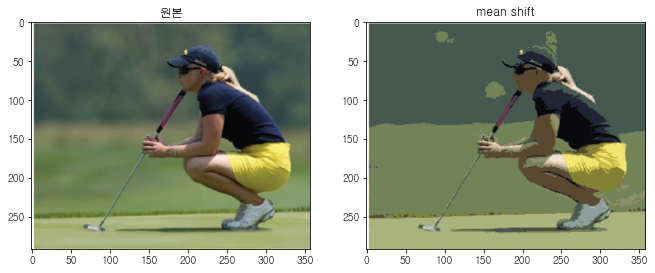

In [17]:
# ex) mean-shift sklearn 이용.
#https://stackoverflow.com/questions/62575894/how-to-find-clusters-in-image-using-mean-shift-in-python-opencv


from sklearn.cluster import MeanShift, estimate_bandwidth

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt
import time


img = cv2.imread('../data/mean-shift-data.png')
print(img.shape)
# 이미지를 한 행으로 만들어준다.
flat_image = img.reshape((-1,3))
print(flat_image.shape)
flat_image = np.float32(flat_image)



# meanshift
#최적의 h값 찾아서
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000) 
#meanshift clustering
ms = MeanShift(bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_


# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])


# 각 segment의 평균색을 구해서 대입
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))
result_rgb= cv2.cvtColor(result, cv2.COLOR_BGR2RGB)#PLOT 출력위해

fig =plt.figure(figsize=(11,11))

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#PLOT 출력위해
plt.subplot(221),plt.title("원본")# 2행 2열중 1번째
plt.imshow(img)

plt.subplot(222),plt.title("mean shift")# 2행 2열중 2번째
plt.imshow(result_rgb)


## 5-5. 워터셰드(watershed) 방법.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/water1.png" width="500" height="600">

그림과 같은 지형은 유역의 최저점에서 부터 물이 차올라서, 넘쳐서 바깥쪽으로 흐르면 watershed이다.

> 이미지에서 지형은 어떻게 구할까?

에지 강도맵은 지형이다. 에지 강도값이 그 지점의 높이라 생각한다. (지형이 높으면 분할점이될 가능성이 높으니)

수위 1,2,3.. 채워갈때 다른 유역으로 넘어가는 수위와 위치가 워터셰드가 된다.


먼저 최저영역에 번호를 붙이고 이웃화소를 queue에 넣는다.

#### 팽창연산

팽창연산을 이용해서도 댐을 만들 수 있다.


#### Meyer의 방법.
우선순위 큐를 이용해, 각 화소에 번호를 붙이는데 번호가 안 붙으면 watershed가 된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/water2.png" width="500" height="600">

그 이웃화소는 주변 이웃이 모두 번호가 같으면 번호를 붙여준다.

번호가 안 붙으면 watershed.




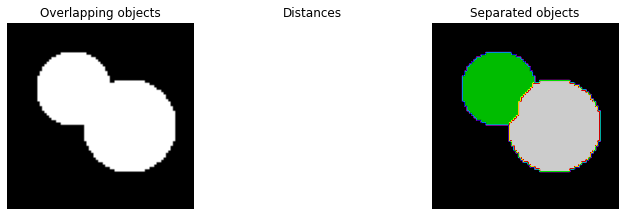

In [24]:
#ex) water-shed. 
# 예제와 달리 마커기반 watershed
#https://blog.naver.com/samsjang/220601488606
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# 겹친 두 원을 생성.
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background

#이미지에서 최저 영역들을 찾아야한다.
#배경과 멀리있을수록 최저영역
distance = ndi.distance_transform_edt(image)# 거리 맵을 만들어준다.
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image) # 거리맵에서 최저영역을 찾고.
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True# 최저영역들을 마스크에 담아서
markers, _ = ndi.label(mask) #번호를 부여한다.
labels = watershed(-distance, markers, mask=image)#watershed

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/distance.PNG" width="200" height="200">

In [31]:
print("로컬 최저점")
peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)

로컬 최저점


array([[44, 52],
       [28, 28]], dtype=int64)

## 5-6. 대화식 물체 분할
---

이전까지는, 전체영상을 배타적인 영역의 여러 집합들로 분할.

관심있는 영역만 잘라내는 분할방식도 필요하다.

이런 종류를 물체/배경 분할(background segmentation)

사용자가 초기 곡선 지정 -> 대화식 시스템

사용자가 곡선을 지정하도록 유도하는것이 바람직해보이지 않을 수 있는데, 

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/matting.png" width="300" height="300">

관심있는 물체를 오리기(matting) -> 합성

과정을 생각해보면, 대화식으로 작업을 하기도한다.


### 5-6-1. 능동 외곽선(active contour)
---

### 스네이크 알고리즘

초기곡선이 주어지고 최적상태를 <span style="color:blue">'능동적으로'</span> 찾아가며, 그결과 외곽선이 된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake1.PNG" width="200" height="200">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake2.PNG" width="200" height="200">

iteration이 지날때마다, 손모양에 가까워진다.

특정 폐곡선 모양을 그려줘야하기에, parametric 이다.

- 이산공간 외곽선(폐곡선) 표현

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake3.PNG" width="300" height="300">

이산공간에서 곡선은 이처럼 나타내고, iteration이 지날때마다 점들이 이동한다.

점들이 이동하는 방법은, 에너지에 따라 결정된다.

이 에너지 식이 최소가 되는 곡선으로 이동.

즉, 최적화 문제로 에너지 식이 목적함수.

##### 에너지 함수 (목적함수)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake_math1.png" width="600" height="700">

이산공간으로 표현하면.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake_math2.png" width="600" height="700">

---

- E_image : 영상의 명암에 반응하는항.

찾고자 하는것이, 물체의 경계이고 edge 강도가 커야한다. 그래서 edge강도에 -를 붙임.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake_math3.png" width="400" height="500">

(edge강도의 제곱)


- E_internal : 곡선의 내부에너지

물체의 경계는 부드럽다는 전제로, 곡률이 작을수록 큰값을 가짐. edge강도가 커져서 노이즈되어 물체를 벗어나는것을 막아줌.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake_math4.png" width="500" height="600">

g_s는 구간의 거리, g_ss는 곡률 계산.

---

##### 최적해 탐색 알고리즘
>  초기 곡선 g0(s)에서 시작하여, 수렴할 때까지 g0(s) -> g1(s) -> g2(s)… 반복

>  greedy 알고리즘

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/snake_algo.PNG" width="700" height="800">


### 지능가위(intelligent scissor)와 레벨 셋(level-set)
---

스네이크보다 진보된 능동 외곽선

##### 지능가위
---

사용자가 원하는 물체 주위를 흰선으로 표시한다.

노란색이 실시간으로 절단된 경계선

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/scissor.png" width="300" height="400">

##### level set
---

스네이크와 달리, 곡선으로 표시하지않고 등고선으로 표현.



## 5-6-2. 그래프 절단 (Graph-Cut)
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/graph1.png" width="500" height="600">

그래프에서 S와 T사이의 노드들을 화소라 생각하자.

EDGE들은 화소들간의 유사도 이다.

오른쪽은 EDGE가 파이프라 생각하고, 최대 흐를 수 있는 양을 나타낸것.

##### 어떤 절단을 해야 영상이 잘 분할될까? 

> edge 비용 '최소' 그래프 절단. 일때, 가장 좋은 영상 분할이다.

> Ford 정리: 최소절단(min-cut)은 최대흐름(max-flow) 상태에서 포화된 edge와 같다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/graph1.png" width="500" height="600">

위 알고리즘에서 S와 T는 각각 사용자가 선택한 Object와 Background가 된다. (정규화 절단과 다른점)


- 그래프 구축
---
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/graphcut1.PNG" width="500" height="600">

S와 T는 나무그림에서 빨간 부분과 배경 부분이다.

S와 T는 모든 화소와 EDGE를 형성한다.

S와 연결된 부분은 절달되면 안되니 100이되고, S와 반대편 T쪽 화소와는 0으로 무조건 절단되게 만들어짐.

그러면, S와 T 랑 바로 연결 안되있는 중간 화소들은

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/graphcut2.PNG" width="500" height="600">

이 식은 중간화소와 S,T 사이의 EDGE 가중치.

예를들어, S와 가까우면 background일 확률이 낮아져 가중치는 커진다. 

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/graphcut3.PNG" width="500" height="600">

이 식은 화소들간의 EDGE 가중치 계산.

여기서 d는 화소간의 X,Y거리이고 4 연결성.


그래프를 구했으면, 절단을 한다.

- 최소 절단
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/graphcut4.PNG" width="500" height="600">

3 + 2+ 3 + 4 +0.. 으로 최소 절단을 실시하면, OBJECT와 BACKGROUND가 분할된다.

결과를 보면, background가 이어져있지 않아도 분할 될 수 있음을 볼 수 있다.

levelset과 마찬가지로 토폴로지를 갖는 분할 결과를 만들어준다. 나무 사진에서도 내부 구멍이 있다. 

지능가위, 스네이크에서는 안되는 것.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/grabcut.png" width="500" height="600">

grab-cut은 그래프 절단을 개선시킨것.


In [ ]:
# open cv grab cut
#https://deep-learning-study.tistory.com/240
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 입력 영상 불러오기
src2 = cv2.imread('../data/mean-shift-data.png')
src = cv2.resize(src2, (1920, 1280))

if src is None:
    print('Image load failed!')
    sys.exit()
    
# 사각형 지정을 통한 초기 분할
mask = np.zeros(src.shape[:2], np.uint8) # 마스크
bgdModel = np.zeros((1, 65), np.float64) # 배경 모델 무조건 1행 65열, float64
fgdModel = np.zeros((1, 65), np.float64) # 전경 모델 무조건 1행 65열, float64

rc = cv2.selectROI(src)

# RECT는 사용자가 사각형 지정. 이 값에서 계속 업데이트
cv2.grabCut(src, mask, rc, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

# mask 4개 값을 2개로 변환
mask = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')
dst = src * mask[:, :, np.newaxis]

# 초기 분할 결과 출력
cv2.imshow('dst', dst)

# 마우스 이벤트 처리 함수 등록
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN: # 왼쪽 버튼은 전경
        cv2.circle(dst, (x, y), 3, (255, 0, 0), -1) # 파랑색 색칠
        cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1) # 마스크에 전경 강제 지정
        cv2.imshow('dst', dst)
    elif event == cv2.EVENT_RBUTTONDOWN: # 오른쪽 버튼은 배경
        cv2.circle(dst, (x, y), 3, (0, 0, 255), -1) # 빨강색 원
        cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1) # 마스크에 배경 강제 지정
        cv2.imshow('dst', dst)
        
    elif event == cv2.EVENT_MOUSEMOVE: # 마우스 움직임
        if flags & cv2.EVENT_FLAG_LBUTTON: # 왼쪽 누르고 움직이면 전경
            cv2.circle(dst, (x, y), 3, (255, 0, 0), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1)
            cv2.imshow('dst', dst)
        elif flags & cv2.EVENT_FLAG_RBUTTON: # 오른쪽 누르고 움직이면 배경
            cv2.circle(dst, (x, y), 3, (0, 0, 255), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1)
            cv2.imshow('dst', dst)

cv2.setMouseCallback('dst', on_mouse)# dst창에서 마우스 작동시마다 이 함수 호출

while True:
    key = cv2.waitKey()
    if key == 13:
        cv2.grabCut(src, mask, rc, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK) # 마스크 초기화
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        dst = src * mask2[:, :, np.newaxis]
        cv2.imshow('dst', dst)

    elif key == 27:
        break

cv2.destroyAllWindows()

결과.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/grab1.png" width="500" height="600">
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/grab2.png" width="500" height="600">
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/grab3.png" width="500" height="600">


## 6-3. 영역 기술자

영역을 표현하는 방법.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor1.png" width="500" height="600">

명암에서 이진영역은 1과 0으로 고치면되고, 이진영역은 방향을 이용해 체인코드로 나타낸다. 체인코드는 경계화소만 연결한다.(둘레)


descriptor는 이 영역에서 부터 정보를 추출하는 것. 그 종류에는

1. 모멘트를 이용해 화소 또는 화소의 명암값의 통계 분포를 추정하고 유용한 정보 얻기.

2. 영역의 모양을 기술하기

3. 푸리에 기술자로, 주파수 공간에서 기술자(특징벡터) 추출


### 6-3-1. 모멘트
---

#### 이진영역 모멘트

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor2.png" width="400" height="500">

m_qp를 (q+p)차 모멘트라고 한다.

이것을 이용해, 영상의 특징을 추출한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor3.png" width="400" height="500">

0차 모멘트는 이진영역에서 1을 모두 더해서, 면적이된다.

1차 모멘트를 면적으로 나누면 무게중심이된다.

하지만, 면적은 이동불변만 중점은 크기 불변만 있다.

#### 이진영역 모멘트 - 중심 모멘트

다른 불변을 만족하기위해 중점을 (0,0)으로 옮긴 모멘트

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor4.png" width="300" height="400">

중심모멘트를 이용해, 새로운 특징을 추출할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor5.png" width="200" height="300">

y축 분산, x축 분산, y,x 공분산

중심모멘트는 이동 불변이된다. 하지만, 스케일 불변은 아니다.

- 스케일 불변 모멘트

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor6.png" width="300" height="400">

중심모멘트를 면적의 어떤 제곱으로(??) 나눠주면, 크기변환에 불변인 모멘트가 된다.

- Hu의 일곱가지 모멘트  (회전, 스케일 불변)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor7.png" width="400" height="500">

스케일 불변 모먼트를 이용하여 7가지 회전,스케일 불변 모멘트를 만들 수 있다.

#### 명암영역 모멘트

이진영역 모멘트에 화소의 명암을 곱한것.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/descriptor8.png" width="300" height="400">


### 6-3-2. 모양
---

#### 기본적인 특징들


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/shape1.PNG" width="450" height="550">

면적은 모두 1로 합한것.

둘레는 체인코드에서 짝수의 개수 + root(2) * 홀수체인수 (홀수는 대각선이라서)

<br>

둘레와 면적을 이용해서, 다른 특성들도 계산할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/shape2.PNG" width="300" height="400">

둥근정도 r은 0~1 값을 가지며, 원일시 1. 영역이 길면 r=0

길쭉한 정도 e 는 둥근정도의 반대. w는 두께로 (침식연산의 반복수) x 2 로 구한다.

주축은 회전시킬시 가장 힘을 적게 받는 방향.

#### 투영(projection) 특징

영역을 가로방향, 세로방향으로 투영하면 기술자를 얻을 수 있다.

특징 수는, 가로 화소수+세로 화소수= M+N개.

가우시안 스무딩으로, 잡음에 둔감해지며. 이웃한 특징들을 평균을 내서 차원을 줄이기도 한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/projection.PNG" width="600" height="700">


#### profile 특징

(방향)에서 행또는 열을 바라볼때 첫번째 1 까지의 거리.

네방향 모두 특징을 삼으면, 2M+2N의 특징을 가진다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/profile2.PNG" width="600" height="700">


### 6-3-3.  푸리에 기술자

푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기함수들의 합으로 분해하여 표현하는것.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier1.PNG" width="500" height="600">

s1(x)와 s2(x) 변화가 다르다. 왜냐면 g(x) 라는 기저함수들의 계수가 다르기 때문.

즉, g(x)들의 계수가 s들의 특징이 될 수 있다는 뜻.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier2.PNG" width="300" height="400">

우리는 입력신호 s만 보고서는 계수를 알아낼 수 없다.

푸리에 변환이 계수를 알려준다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier3.PNG" width="450" height="550">

(1차원 이산공간의 푸리에변환)

입력신호 s에 0부터 n-1까지 넣으면, 계수 t(u)가 나옴. ( 왜 계수지?? s(0)의 계수를 어떻게 구하나?)

식의 결과로, 계수는 실수부와 허수부(j)로 분리된다.


#### 이미지 영역 푸리에 변환
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/area_image.PNG" width="200" height="300">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier4.PNG" width="500" height="600">

영역에서, 경계 점들을 복소수 처럼 나타내자. y를 실수부 x축을 허수부로. 화소가 입력신호 s가 되는것.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier5.PNG" width="300" height="400">

이제 s가 구해졌으니 푸리에변환을 하면, n개의 계수가 나온다.( u: 0~n-1)

여기서 d개만 특징으로 취하면 실수부, 허수부 2d개의 차원을 가진 특징벡터가 된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier6.PNG" width="500" height="600">

푸리에 역변환으로, 푸리에 기술자로부터 원래 영역을 복구하기.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier_inverse_transform.PNG" width="300" height="400">

d=n 일때, 원래의 영역과 같아짐.

d개의 특징중 소수만 있어도, 원래의 모양을 유지해줌.

In [ ]:
# ex) 푸리에 descriptor 추출
